In [2]:
# libraries

import pandas
import random
import datetime

import classes
import IO
from interface import get_orbit_from, check_validity, plot_data

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates

from prepare_data import get_data, display_data

In [30]:
orbit = random.randint(10,3190)
if True:
    print('orbit :{}'.format(orbit))

datapath='/Users/alexanderwolff/Local/processed_data'

orbit :2317


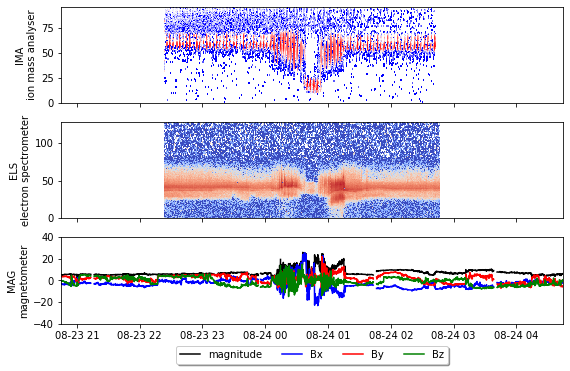

In [31]:
# choose 'ELS' or 'IMA' as your instrument
instrument = 'IMA' 


# get the data : data is stored as a pandas dataframe (read up on it if needed)
dataframe, sample_rate = get_data(orbit, instrument, datapath, preview = True, debug=False, verbose=False)

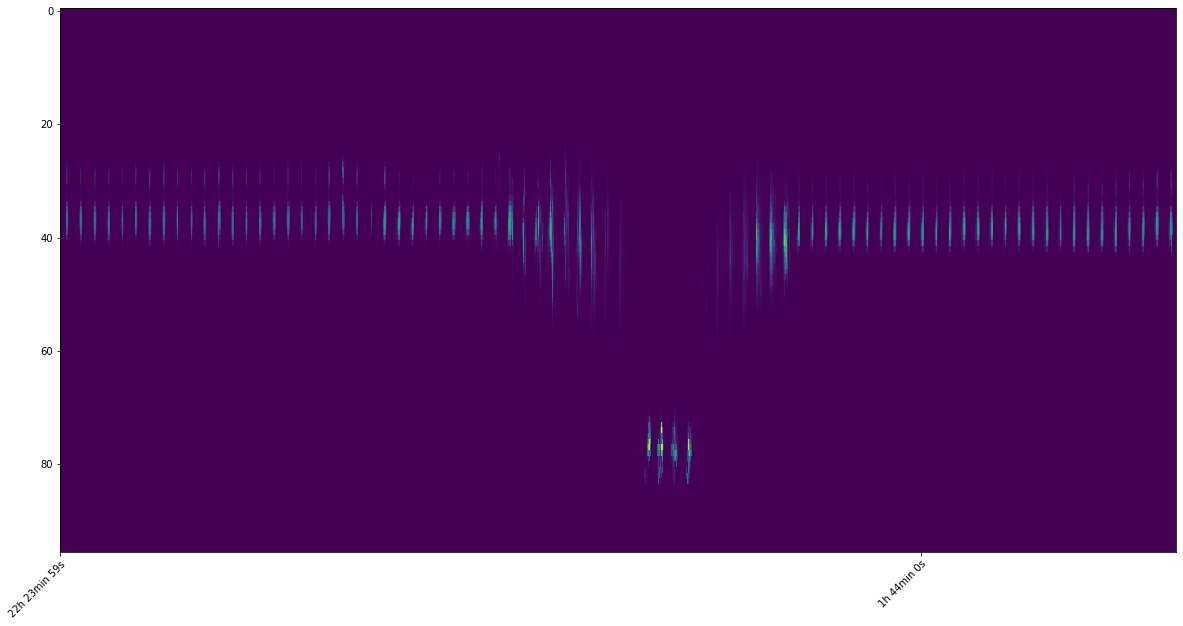

In [32]:
# example: displaying the data as an image
display_data(dataframe)

No time index found: Using default index instead.


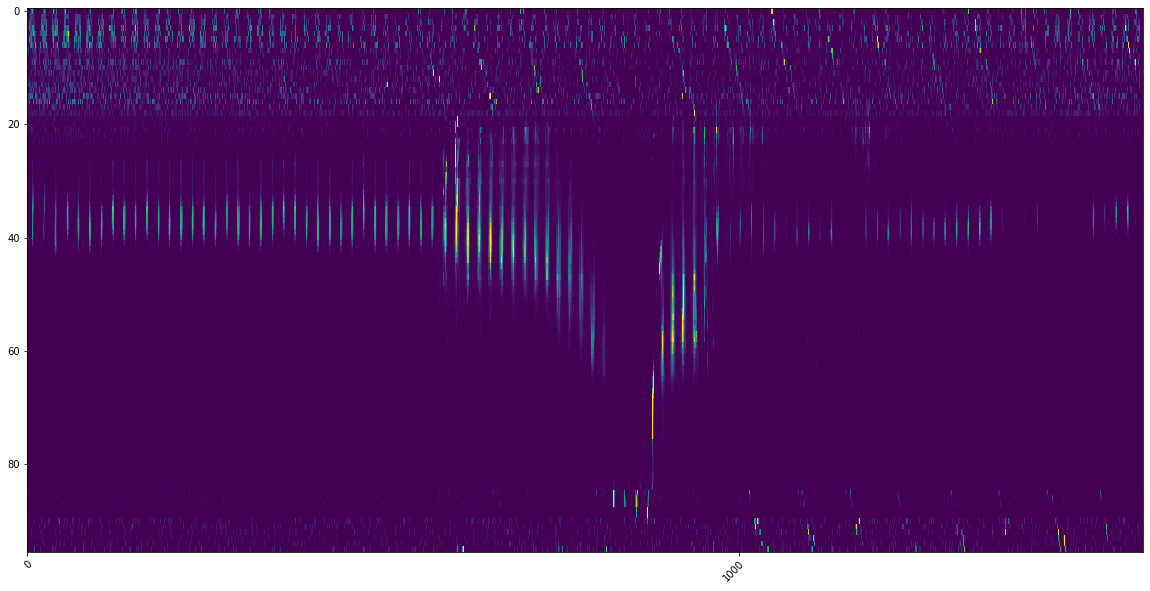

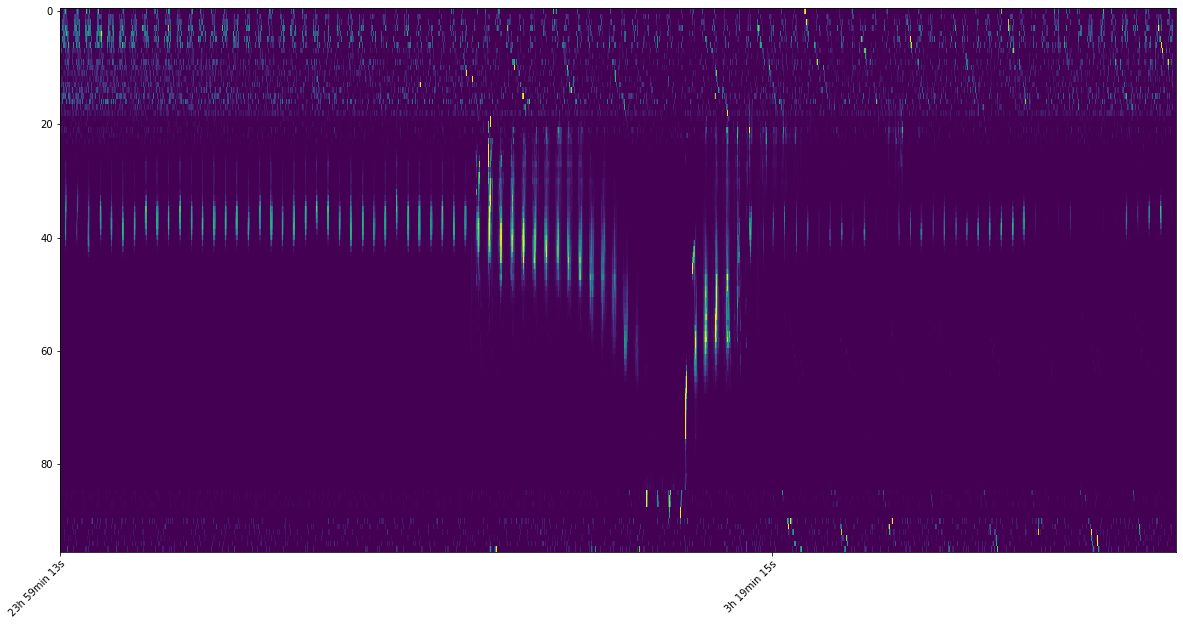

In [20]:
# example : scaling the data using scikit learn preprocessing

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dataframe)
scaled_data = pandas.DataFrame(x_scaled)
display_data(scaled_data)

# making sure the x axis displays time instead of sampe number
scaled_data.index = dataframe.index
display_data(scaled_data)

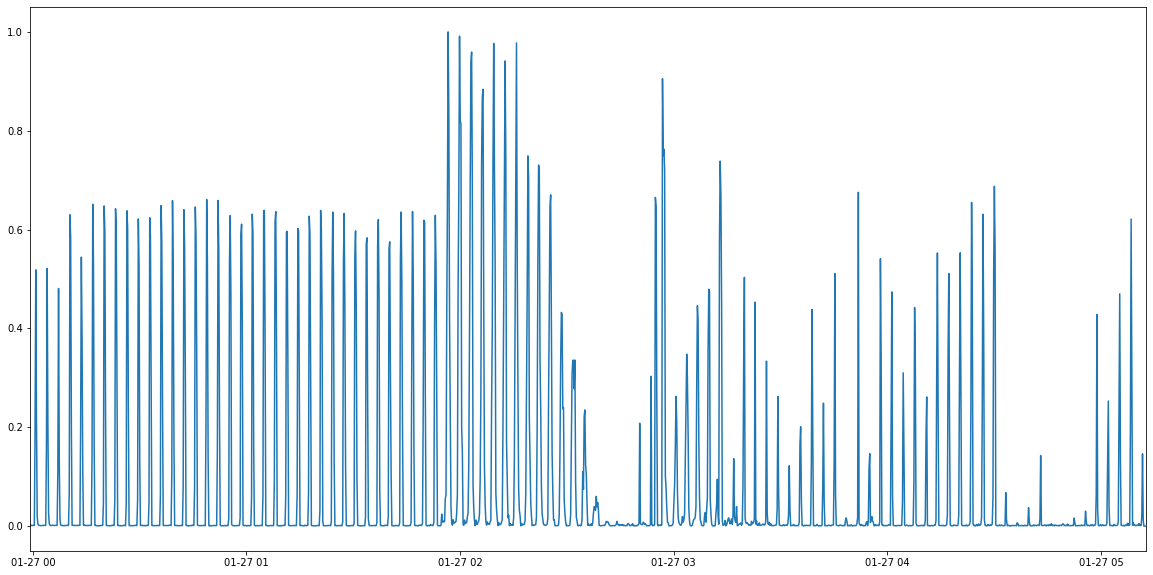

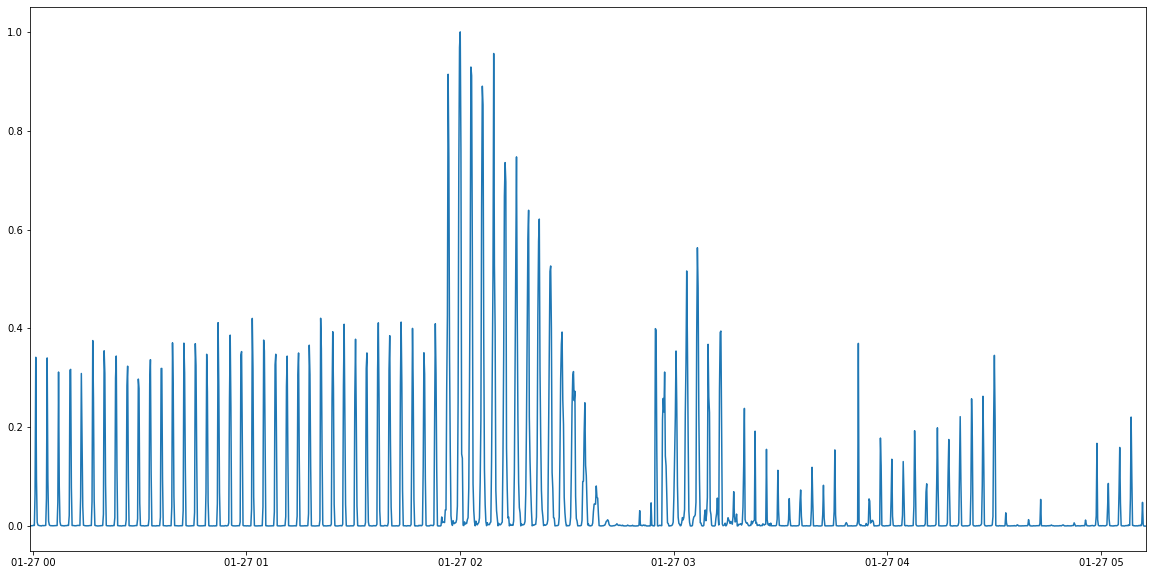

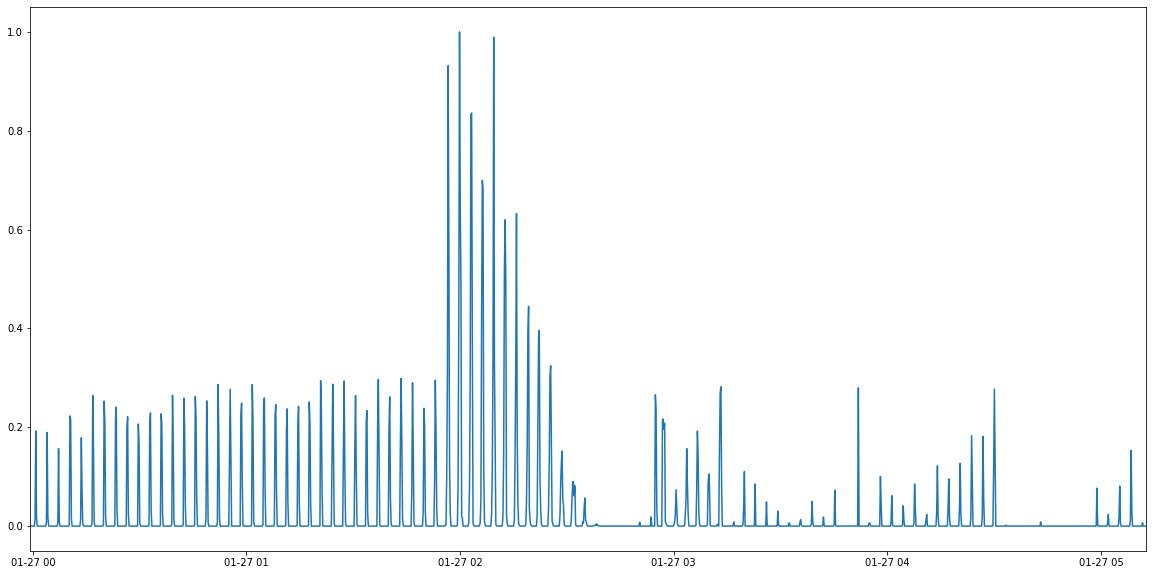

In [19]:
# plotting various linear traces
transposed = dataframe.T
T = dataframe.index

plt.figure(figsize=(20,10))
trace = transposed.max()
plt.plot(trace/trace.max())
plt.xlim([T[0], T[len(T)-1]])
plt.show()

plt.figure(figsize=(20,10))
trace = transposed.mean()
plt.plot(trace/trace.max())
plt.xlim([T[0], T[len(T)-1]])
plt.show()

plt.figure(figsize=(20,10))
trace = transposed.var()
plt.plot(trace/trace.max())
plt.xlim([T[0], T[len(T)-1]])
plt.show()